<h1>PCA

- |Importing Libraries

In [197]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import pandas as pd
import sklearn.metrics  
import torch
import torchvision.transforms.functional as fn
from PIL import Image

Loading image and changing values to RGB<br> We will use CV2 Library

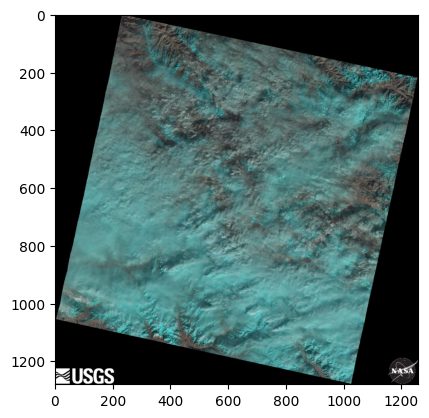

In [198]:
img = cv2.cvtColor(cv2.imread('image.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

Image Shape

In [199]:
img.shape

(1280, 1258, 3)

<h3>1- Visualize different Bands.

- Splitting image into RGB bands

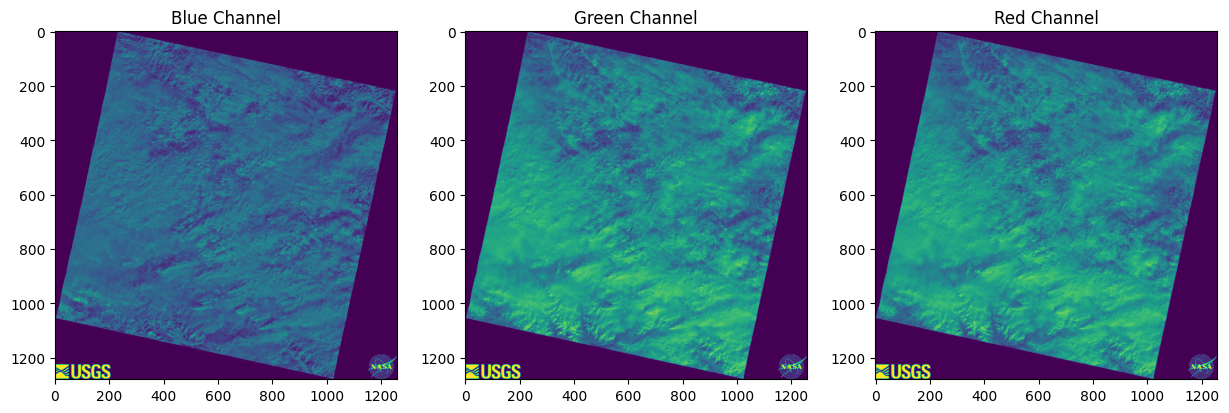

In [200]:
# Splitting into channels
blue, green, red = cv2.split(img)

# Plotting the different images
fig = plt.figure(figsize = (15, 7.2)) 

fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

- Verification of bands

In [201]:
blue_temp_df = pd.DataFrame(data = red)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0,245,255,255,246,255,255,254,255,255,...,0,0,0,0,0,0,0,0,0,0
1276,6,255,249,255,254,241,255,247,253,253,...,0,0,0,0,0,0,0,0,0,0
1277,0,255,255,245,255,254,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1278,11,237,255,255,250,252,253,255,254,254,...,0,0,0,0,0,0,0,0,0,0


- Standarizing RGB values (range (0-1|))

In [202]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [203]:
print(df_green.shape)
print(df_red.shape)
print(df_blue.shape)

(1280, 1258)
(1280, 1258)
(1280, 1258)


Now we apply PCA

In [204]:
pca_b = PCA(n_components = 50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_r = PCA(n_components = 50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

pca_g = PCA(n_components = 50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

In [205]:
print("PCA (50) on blue band: ", trans_pca_b.shape)
print("PCA (50) on red band: ", trans_pca_r.shape)
print("PCA (50) on green band: ", trans_pca_g.shape)

PCA (50) on blue band:  (1280, 50)
PCA (50) on red band:  (1280, 50)
PCA (50) on green band:  (1280, 50)


- Finding variance ratio

In [206]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9147929082326121
Green Channel: 0.9541307116679816
Red Channel  : 0.9547586236025853


The size of list must be equal to the component size

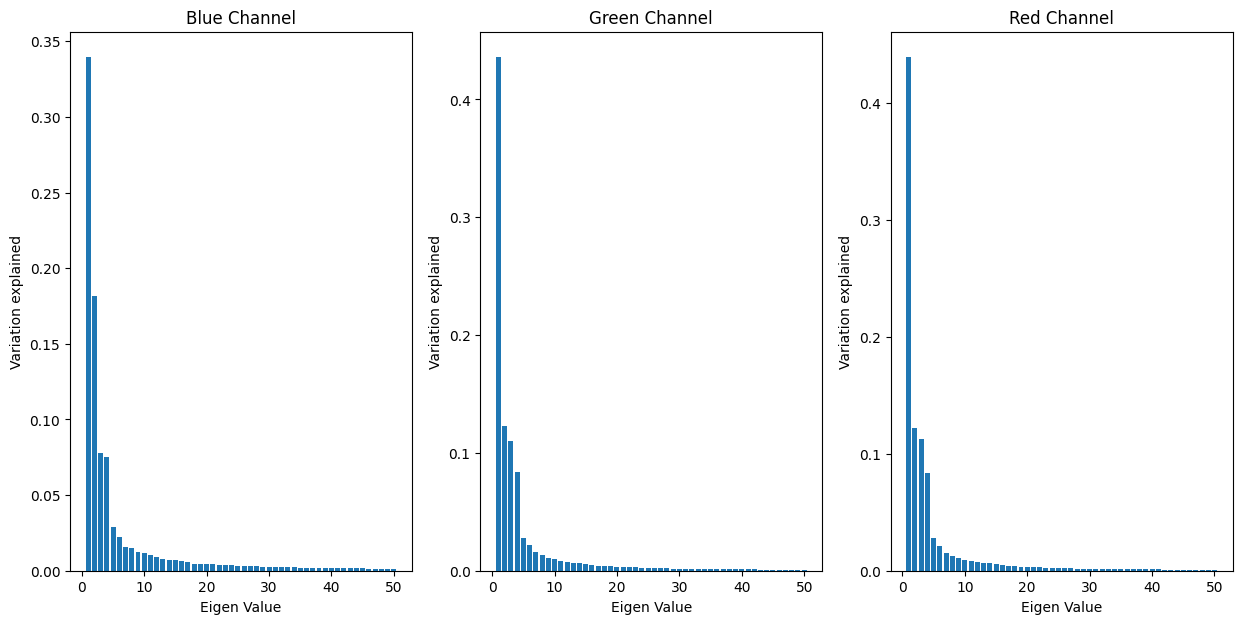

In [207]:
fig = plt.figure(figsize = (15, 7)) 

fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [208]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(1280, 1258) (1280, 1258) (1280, 1258)


<h3>2- Concatenating the bands

- Reducing image

In [209]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(1280, 1258, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


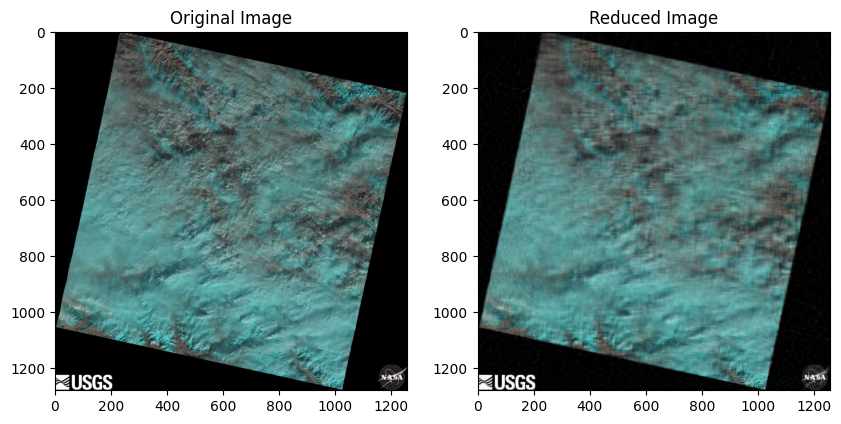

In [210]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

<h3>3- Cropping the image

- Original Image

In [211]:
img = Image.open("image.jpeg")
print("This is size of original image:",img.size, "\n")

This is size of original image: (1258, 1280) 



- Croppped Image

In [212]:
crop = fn.center_crop(img, output_size=[1000])
print("This is the size of cropped image:",crop.size,"\n")

This is the size of cropped image: (1000, 1000) 



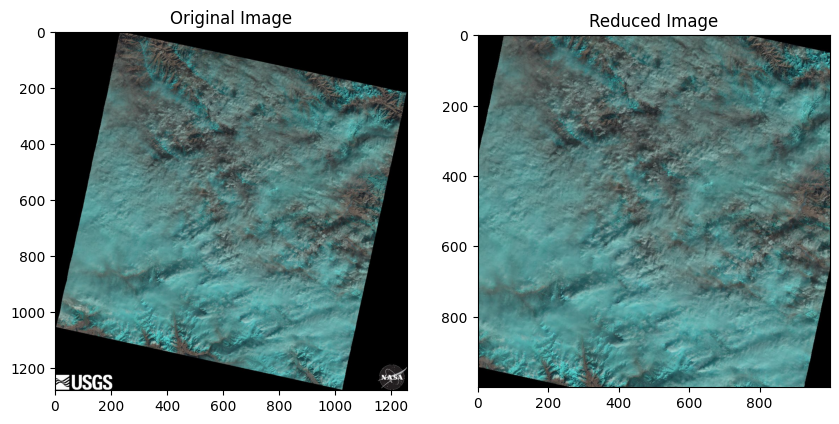

In [213]:
fig = plt.figure(figsize = (10, 7)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow((img))

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(crop)

<h4>4- Calculating loss for PCA

- Changing Shape from 3D to 2D

In [214]:
img3 = cv2.cvtColor(cv2.imread('image.jpeg'), cv2.COLOR_BGR2RGB)
print("Shape in 3d: ", img3.shape)
nsamples, nx, ny = img3.shape
img3 = img3.reshape((nsamples,nx*ny))
print("Shape in 2d: ", img3.shape)

Shape in 3d:  (1280, 1258, 3)
Shape in 2d:  (1280, 3774)


- Calculating MSE

In [215]:
#Function to calculate loss
def calc_loss(components):
    pca = PCA(n_components=components)
    pca.fit(img3)

    img3_pca = pca.transform(img3)

    img3_projected = pca.inverse_transform(img3_pca)

    loss = np.sum((img3 - img3_projected) ** 2, axis=1).mean()
    
    return loss

In [216]:
print("Loss with 30 components: ", calc_loss(30))
print("Loss with 500 components: ", calc_loss(500))
print("Loss with 1000 components: ", calc_loss(1000))

Loss with 30 components:  754018.1136030362
Loss with 500 components:  21532.82234207398
Loss with 1000 components:  424.68100273115317
